# Importação de Bibliotecas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")

# Importando dados

In [ ]:
imrs = pd.read_excel("dados/2_dados_trabalhados/IMRS/IMRS.xlsx")
munic = pd.read_excel("dados/2_dados_trabalhados/MUNIC/MUNIC.xlsx")
municipio = pd.read_excel("dados/2_dados_trabalhados/MUNICIPIO/MUNICIPIO.xlsx")
pergunta_munic = pd.read_excel("dados/2_dados_trabalhados/PERGUNTA_MUNIC/PERGUNTA_MUNIC.xlsx")
populacao = pd.read_excel("dados/2_dados_trabalhados/POPULACAO/POPULACAO.xlsx")
repasse = pd.read_excel("dados/2_dados_trabalhados/REPASSE/REPASSE.xlsx")

In [32]:
def query_1(municipio = municipio, repasse = repasse, imrs = imrs, populacao = populacao):
    df = pd.merge(municipio, repasse, on="ibge6")
    df = pd.merge(df, imrs, on=["ibge7", "ano"])
    df = pd.merge(df, populacao, on=["ibge7", "ano"])
    df = df.groupby(["nome", "ibge7", "ano", "desc", "valor", "qnt"], as_index=False).sum()
    df = df.sort_values(by=["nome", "ano"])
    df["emp_per_cap"] = df["vl_emp"]/df["qnt"]
    df["pg_per_cap"] = df["vl_pg"]/df["qnt"]
    df["resultado"] = df["valor"]
    select = ["nome", "ibge7", "ano", "desc", "resultado", "emp_per_cap", "pg_per_cap"]
    return df[select]

def query_2(municipio = municipio, repasse = repasse, munic = munic, pergunta_munic = pergunta_munic, populacao = populacao):
    df = pd.merge(municipio, repasse, on="ibge6")
    df = pd.merge(df, munic, on=["ibge7", "ano"])
    df = pd.merge(df, pergunta_munic, left_on="cd", right_on="cdPerg")
    df = pd.merge(df, populacao, on=["ibge7", "ano"])
    df = df.query("cdPerg == 'MSAU15'")
    df = df.groupby(["nome", "ibge7", "ano", "cd", "descAdap", "resp", "qnt"], as_index=False).sum()
    df = df.sort_values(by=["nome", "ano"])
    df["emp_per_cap"] = df["vl_emp"]/df["qnt"]
    df["pg_per_cap"] = df["vl_pg"]/df["qnt"]
    select = ["nome", "ibge7", "ano", "cd", "descAdap", "resp", "emp_per_cap", "pg_per_cap"]
    return df[select]

# Análise de Indicadores

Para cada um dos indicadores listados abaixo, criar um gráfico de dispersão com linha de tendência (valor empenhado per capita X indicador) para cada ano de 2018 a 2021.

* Taxa bruta de mortalidade
* Proporção de nascidos vivos com baixo peso
* Proporção da população atendida pela Estratégia de Saúde da Família
* Cobertura vacinal contra poliomielite em menores de 1 ano
* Proporção de internações hospitalares por condições sensíveis à atenção primária (portaria N.º 221 de 17 de abril 2008)
* Proporção das internações de média complexidade de pacientes do SUS encaminhados para outra microrregião
* Proporção das internações para o parto de pacientes do SUS encaminhadas para outra microrregião

<AxesSubplot:xlabel='emp_per_cap', ylabel='resultado'>

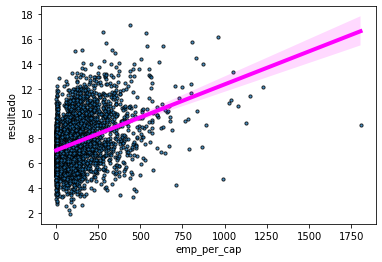

In [31]:
sns.regplot(x='emp_per_cap', y='resultado', data=df, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':10, 'alpha':0.8})

# Análise das Respostas

Para cada um dos indicadores listados abaixo, criar um boxplot (valor empenhado per capita X indicador) para 2018 e para 2021
* MSAU17 - Fundo Municipal de Saude - existencia
* MSAU171 - [FMS] Responsavel pela gestao do fundo
* MSAU25 - Estabelecimento de saude de responsabilidade da gestao municipal - existencia
* MSAU26 - [ESTAB. DE SAUDE DE RESP. DA GESTAO MUN.] Estabelecimentos de saude administrado por terceiros - existencia
* MSAU42 - E preciso referenciar para outro municipio a realizacao de exames de pacientes da Atencao Basica
* MSAU43 - E preciso referenciar para outro municipio internacoes de pacientes da Atencao Basica

Index(['nome', 'ibge7', 'ano', 'cd', 'descAdap', 'resp', 'emp_per_cap',
       'pg_per_cap'],
      dtype='object')


<AxesSubplot:title={'center':'emp_per_cap'}, xlabel='resp'>

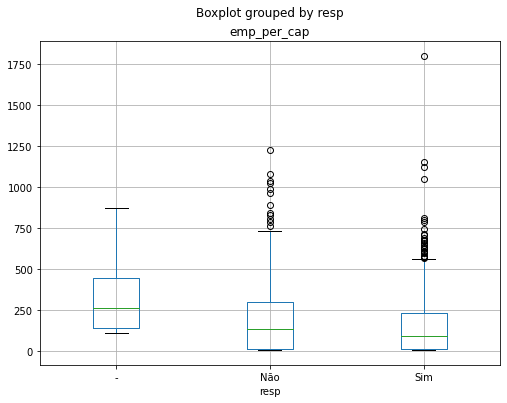

In [41]:
df = query_2().query("cd == 'MSAU15'")
print(df.columns)
df[["emp_per_cap", "resp"]].boxplot(column='emp_per_cap',by='resp')


# cols = [df["resp"].to_list, df["emp_per_cap"].to_list]
# plt.rcParams['figure.figsize']  = (8, 6)
# plt.boxplot(cols, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
# plt.xticks([1,2], ['Municipal', 'Federal'], fontsize=10)
# plt.ylabel('', fontsize=13)
# plt.xlabel('DEPENDENCIA_ADMINISTRATIVA', fontsize=12)
# plt.title('Notas Médias das Escolas por Dependência Administrativa', fontsize=14)
# plt.show()